In [1]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz


# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [4]:
df = pd.read_csv('Loan_prediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df['Dependents'] = df['Dependents'].replace(["3+"],3)

In [11]:
df=pd.get_dummies(df, columns=['Married','Gender','Education','Self_Employed','Property_Area','Loan_Status'])

In [12]:
X=df[list(df)[1:17]]

In [13]:
y=df['Loan_Status_Y']

In [14]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [15]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)

(336, 16)

(144, 16)

In [16]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [17]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [19]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.7083333333333334

<Figure size 1080x1080 with 0 Axes>

[Text(418.5, 733.86, 'node #0\nCredit_History <= -1.003\ngini = 0.427\nsamples = 336\nvalue = [104, 232]\nclass = Yes'),
 Text(220.26315789473685, 570.78, 'node #1\nApplicantIncome <= -0.125\ngini = 0.115\nsamples = 49\nvalue = [46, 3]\nclass = No'),
 Text(132.1578947368421, 407.70000000000005, 'node #2\nLoan_Amount_Term <= -1.567\ngini = 0.059\nsamples = 33\nvalue = [32, 1]\nclass = No'),
 Text(88.10526315789474, 244.62, 'node #3\nApplicantIncome <= -0.494\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = No'),
 Text(44.05263157894737, 81.54000000000008, '\n  (...)  \n'),
 Text(132.1578947368421, 81.54000000000008, '\n  (...)  \n'),
 Text(176.21052631578948, 244.62, 'node #6\ngini = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = No'),
 Text(308.36842105263156, 407.70000000000005, 'node #7\nApplicantIncome <= -0.027\ngini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = No'),
 Text(264.3157894736842, 244.62, 'node #8\ngini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(352.4210

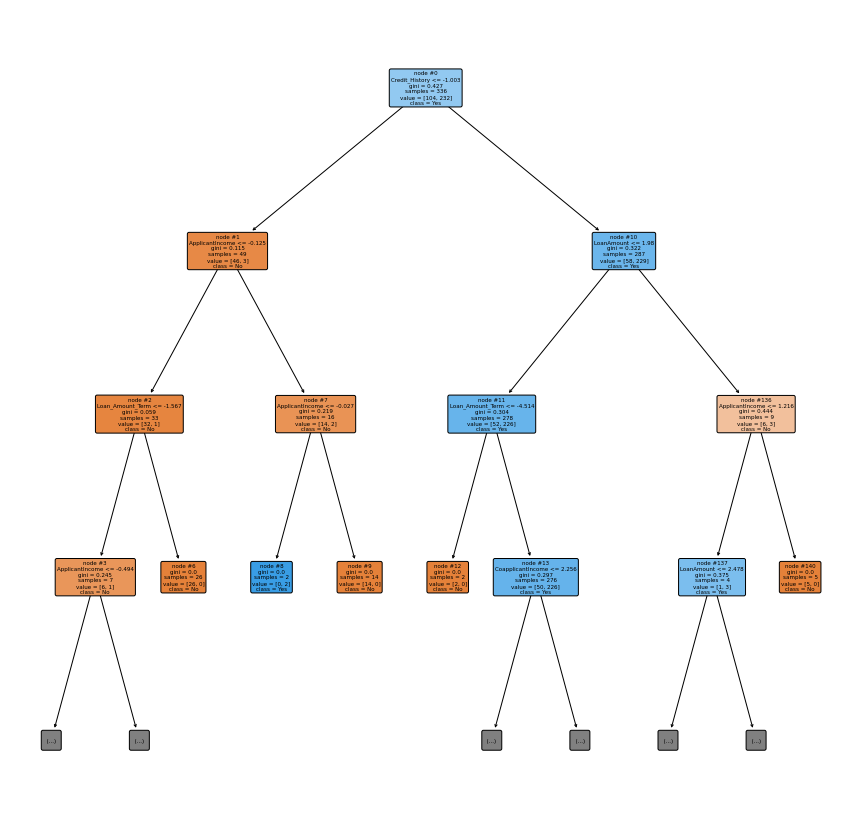

In [21]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:17],
            class_names = ["No","Yes"]
            )

plt.show()

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(390.59999999999997, 733.86, 'node #0\nCredit_History <= -1.003\nentropy = 0.893\nsamples = 336\nvalue = [104, 232]\nclass = Yes'),
 Text(223.2, 570.78, 'node #1\nLoanAmount <= 0.339\nentropy = 0.332\nsamples = 49\nvalue = [46, 3]\nclass = No'),
 Text(167.39999999999998, 407.70000000000005, 'node #2\nLoanAmount <= 0.227\nentropy = 0.431\nsamples = 34\nvalue = [31, 3]\nclass = No'),
 Text(111.6, 244.62, 'node #3\nProperty_Area_Rural <= 0.464\nentropy = 0.33\nsamples = 33\nvalue = [31, 2]\nclass = No'),
 Text(55.8, 81.54000000000008, '\n  (...)  \n'),
 Text(167.39999999999998, 81.54000000000008, '\n  (...)  \n'),
 Text(223.2, 244.62, 'node #14\nentropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(279.0, 407.70000000000005, 'node #15\nentropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = No'),
 Text(558.0, 570.78, 'node #16\nLoanAmount <= 1.98\nentropy = 0.726\nsamples = 287\nvalue = [58, 229]\nclass = Yes'),
 Text(390.59999999999997, 407.70000000000005, 'node #17\nLoan_A

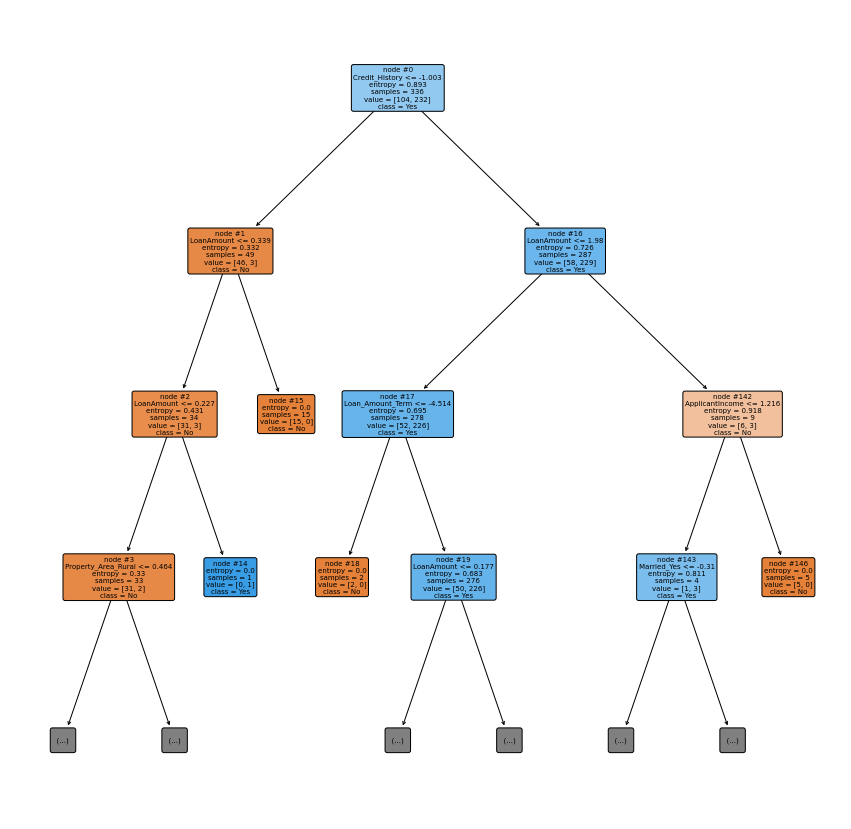

In [23]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
ct.fit(X_train,y_train)

# 5.2
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:17],
            class_names = ["No","Yes"]
            )

plt.show()

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(443.11764705882354, 733.86, 'node #0\nCredit_History <= -1.003\nentropy = 0.895\nsamples = 334\nvalue = [104, 230]\nclass = Yes'),
 Text(246.1764705882353, 570.78, 'node #1\nApplicantIncome <= 0.005\nentropy = 0.536\nsamples = 49\nvalue = [43, 6]\nclass = No'),
 Text(196.94117647058823, 407.70000000000005, 'node #2\nApplicantIncome <= -0.185\nentropy = 0.65\nsamples = 36\nvalue = [30, 6]\nclass = No'),
 Text(98.47058823529412, 244.62, 'node #3\nCoapplicantIncome <= 0.331\nentropy = 0.345\nsamples = 31\nvalue = [29, 2]\nclass = No'),
 Text(49.23529411764706, 81.54000000000008, '\n  (...)  \n'),
 Text(147.70588235294116, 81.54000000000008, '\n  (...)  \n'),
 Text(295.4117647058823, 244.62, 'node #10\nLoanAmount <= -0.351\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(246.1764705882353, 81.54000000000008, '\n  (...)  \n'),
 Text(344.6470588235294, 81.54000000000008, '\n  (...)  \n'),
 Text(295.4117647058823, 407.70000000000005, 'node #13\nentropy = 0.0\nsamples 

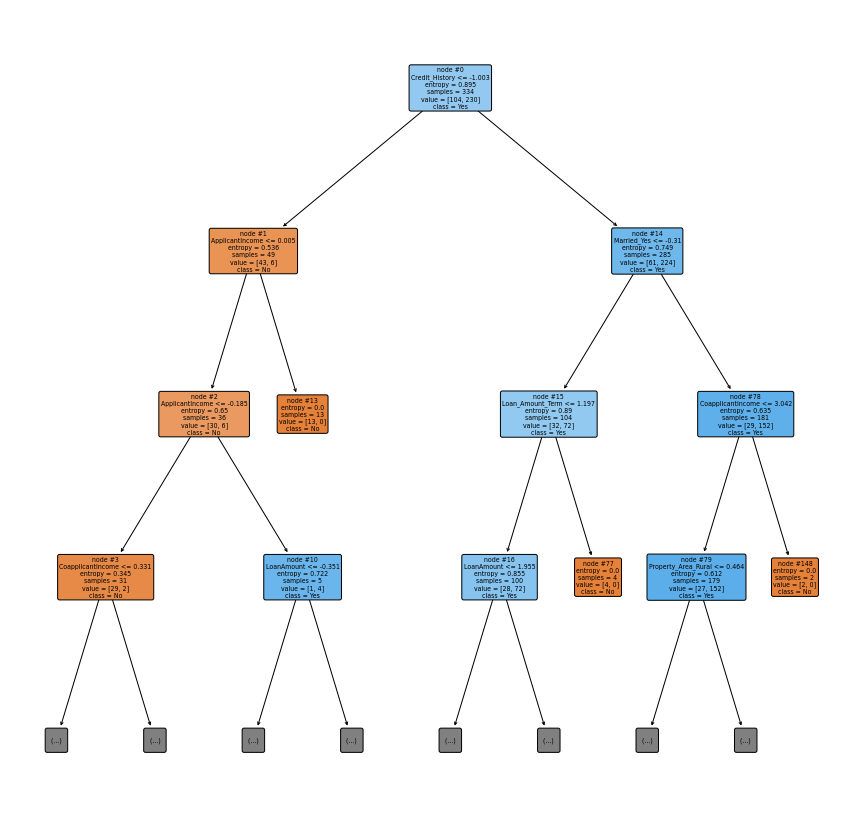

In [24]:
# 5.3 Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
ct1.fit(X_train[2:,:],y_train[2:])

##
plt.figure(figsize=(15,15))
plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:17],
            class_names = ["No","Yes"]
            )

plt.show()

In [25]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size 

0.8888888888888888